In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from math import sqrt
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

# Data import, cleaning and analysis
The first step would be to import the data in order to prepare it for the algorithm.
To do so, we'll start by importing the data and list every feature

In [2]:
data = pd.read_csv('train.csv')
for name,dtype in zip(data.columns, data.dtypes):
    print(name,": ", dtype, "         Ex: ", data[name].iloc[0], "    Number of NaN: ", data[name].isnull().sum())

Id :  int64          Ex:  1     Number of NaN:  0
MSSubClass :  int64          Ex:  60     Number of NaN:  0
MSZoning :  object          Ex:  RL     Number of NaN:  0
LotFrontage :  float64          Ex:  65.0     Number of NaN:  259
LotArea :  int64          Ex:  8450     Number of NaN:  0
Street :  object          Ex:  Pave     Number of NaN:  0
Alley :  object          Ex:  nan     Number of NaN:  1369
LotShape :  object          Ex:  Reg     Number of NaN:  0
LandContour :  object          Ex:  Lvl     Number of NaN:  0
Utilities :  object          Ex:  AllPub     Number of NaN:  0
LotConfig :  object          Ex:  Inside     Number of NaN:  0
LandSlope :  object          Ex:  Gtl     Number of NaN:  0
Neighborhood :  object          Ex:  CollgCr     Number of NaN:  0
Condition1 :  object          Ex:  Norm     Number of NaN:  0
Condition2 :  object          Ex:  Norm     Number of NaN:  0
BldgType :  object          Ex:  1Fam     Number of NaN:  0
HouseStyle :  object          Ex: 

Given this analysis, we can notice that some features doesn't contain any valuable information
Those features are:
- Id
- ...

In addition of that, we notice that there is many missing values. The job here would be to differanciate missing values (errors in the dataset) from the absence of the concernate feature in the house.

In the first case, we'll remove the row.

In the second case, we'll considere any object that can be absent as added value, and thus replacing NaNs by zero.

In [3]:
data.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [4]:
for column in data:
    print(data[column].value_counts())

1460    1
479     1
481     1
482     1
483     1
       ..
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64
7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311


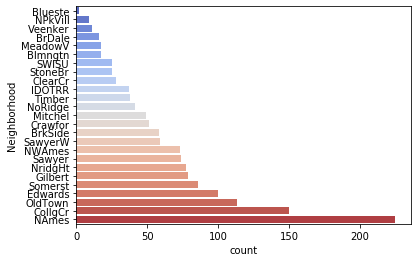

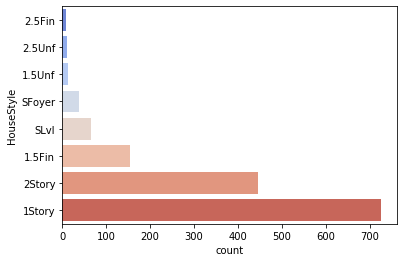

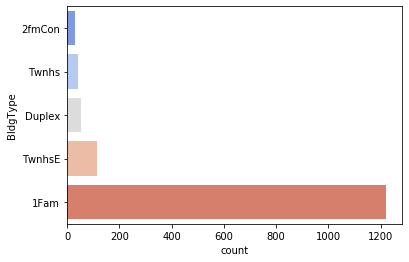

In [5]:
ax = sns.countplot(y="Neighborhood", data=data, order=data["Neighborhood"].value_counts().sort_values().index, palette ='coolwarm') #comment changer la taille
plt.show()
ax = sns.countplot(y="HouseStyle", data=data, order=data["HouseStyle"].value_counts().sort_values().index, palette ='coolwarm') #comment changer la taille
plt.show()
ax = sns.countplot(y="BldgType", data=data, order=data["BldgType"].value_counts().sort_values().index, palette ='coolwarm') #comment changer la taille
plt.show()


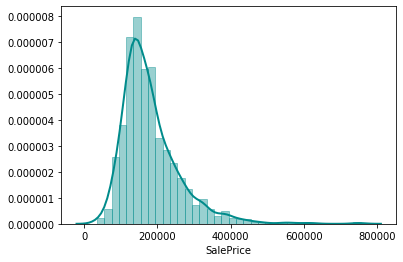

In [6]:
# Price distribution

sns.distplot(data["SalePrice"], hist=True, kde=True, 
             bins=int(180/5), color = 'darkcyan', 
             hist_kws={'edgecolor':'darkcyan'},
             kde_kws={'linewidth': 2})

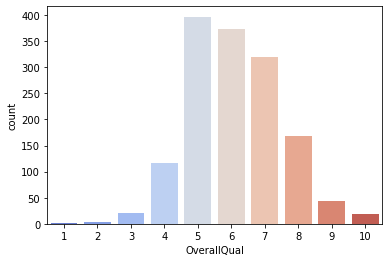

In [7]:
# Overall quality

ax = sns.countplot(x="OverallQual", data=data, palette ='coolwarm') 
plt.show()

Clean Nan
Given this analysis, we can notice that some features do not contain any valuable information. The ID Column is a good example. For this reason the ID column will be droped from the test set

In addition of that, we notice that there is many missing values. The job here would be to differanciate missing values (errors in the dataset) from the absence of the concernate feature in the house.

In the first case some columns have a high amount of missing values and might be related to other column that are more complete. The columns with a significant amount of missing values are:

- LotFrontage: 259 NaN
- Alley: 1369 NaN
- FireplaceQu: 690 NaN
- PoolQC: 1453 NaN
- Fence: 1179 NaN
- MiscFeature: 1406 NaN

For LotFrontage, since there is difficult to have no frontage we assumed that the NaN values can be replaced by the median. For PoolQC and MiscFeature that have above 95% of missing values and taken into account that the features PoolArea and MiscVal were complete, it was possible to remowe the features. In the case of the others the NaN values were set to 0 since it is probable that they the houses do not have this feature.

For the same reason, all the lower missing value number were also set to 0.

In [8]:
#Trop de Nan et était déjà quasiment expliqué par une autre colonne
data_cleaned=data.drop(columns=["Id","PoolQC","MiscFeature"] )  

data_cleaned['LotFrontage'] = data_cleaned['LotFrontage'].fillna(data_cleaned['LotFrontage'].median()) #remplacer les Nan par la médiane
data_cleaned['Alley'] = data_cleaned['Alley'].fillna(0) #y'a pas d'alley donc 0
data_cleaned['MasVnrType'] = data_cleaned['MasVnrType'].fillna('None') #Car la plupart des valeur c'est None
data_cleaned['MasVnrArea'] = data_cleaned['MasVnrArea'].fillna(0) #quand y'en a pas


#la y'a juste pas de basement
data_cleaned['BsmtQual'] = data_cleaned['BsmtQual'].fillna(0)
data_cleaned['BsmtCond'] = data_cleaned['BsmtCond'].fillna(0)
data_cleaned['BsmtExposure'] = data_cleaned['BsmtExposure'].fillna(0)
data_cleaned['BsmtFinType1'] = data_cleaned['BsmtFinType1'].fillna(0)
data_cleaned['BsmtFinType2'] = data_cleaned['BsmtFinType2'].fillna(0)
data_cleaned['BsmtCond'] = data_cleaned['BsmtCond'].fillna(0)


data_cleaned['Electrical'] = data_cleaned['Electrical'].fillna(0) #disont que cette maison n'a pas d'électricité

data_cleaned['FireplaceQu'] = data_cleaned['FireplaceQu'].fillna(0) #et pas de Fireplace

data_cleaned['GarageType'] = data_cleaned['GarageType'].fillna(0) # ni garage
data_cleaned['GarageYrBlt'] = data_cleaned['GarageYrBlt'].fillna(0) 
data_cleaned['GarageFinish'] = data_cleaned['GarageFinish'].fillna(0) 
data_cleaned['GarageQual'] = data_cleaned['GarageQual'].fillna(0) 
data_cleaned['GarageCond'] = data_cleaned['GarageCond'].fillna(0) 

data_cleaned['Fence'] = data_cleaned['Fence'].fillna(0) #pas de cloture

for name,dtype in zip(data_cleaned.columns, data_cleaned.dtypes):
    print(name,": ", dtype, "         Ex: ", data_cleaned[name].iloc[0], "    Number of NaN: ", data_cleaned[name].isnull().sum())

MSSubClass :  int64          Ex:  60     Number of NaN:  0
MSZoning :  object          Ex:  RL     Number of NaN:  0
LotFrontage :  float64          Ex:  65.0     Number of NaN:  0
LotArea :  int64          Ex:  8450     Number of NaN:  0
Street :  object          Ex:  Pave     Number of NaN:  0
Alley :  object          Ex:  0     Number of NaN:  0
LotShape :  object          Ex:  Reg     Number of NaN:  0
LandContour :  object          Ex:  Lvl     Number of NaN:  0
Utilities :  object          Ex:  AllPub     Number of NaN:  0
LotConfig :  object          Ex:  Inside     Number of NaN:  0
LandSlope :  object          Ex:  Gtl     Number of NaN:  0
Neighborhood :  object          Ex:  CollgCr     Number of NaN:  0
Condition1 :  object          Ex:  Norm     Number of NaN:  0
Condition2 :  object          Ex:  Norm     Number of NaN:  0
BldgType :  object          Ex:  1Fam     Number of NaN:  0
HouseStyle :  object          Ex:  2Story     Number of NaN:  0
OverallQual :  int64       

In [9]:
data_cleaned['MSZoning'] = data_cleaned['MSZoning'].replace("C (all)", 0).replace("RH", 1).replace("RM", 2).replace("RL", 3).replace("FV", 4)
data_cleaned['Street'] = data_cleaned['Street'].replace("Grvl", 1).replace("Pave", 2)
data_cleaned['Alley'] = data_cleaned['Alley'].replace("Grvl", 1).replace("Pave", 2)
data_cleaned['LotShape'] = data_cleaned['LotShape'].replace("Reg", 0).replace("IR1", 1).replace("IR2", 2).replace("IR3", 3) #retrouver le petit quartier pour adapter les codes
data_cleaned['LandContour'] = data_cleaned['LandContour'].replace("Low", 0).replace("HLS", 1).replace("Bnk", 2).replace("Lvl", 3) #A voir si les valeur ont du sens
data_cleaned['Utilities'] = data_cleaned['Utilities'].replace("NoSeWa", 0).replace("AllPub", 1)
data_cleaned['LotConfig'] = data_cleaned['LotConfig'].replace("Inside", 0).replace("Corner", 1).replace("FR2", 2).replace("FR3", 3).replace("CulDSac", 4)
data_cleaned['LandSlope'] = data_cleaned['LandSlope'].replace("Sev", 0).replace("Mod", 1).replace("Gtl", 2)
data_cleaned['Neighborhood'] = data_cleaned['Neighborhood'].replace("NAmes", 0).replace("CollgCr",1).replace("OldTown",2).replace("Edwards",3).replace("Somerst", 4).replace("Gilbert", 5).replace("NridgHt", 6).replace("Sawyer", 7).replace("NWAmes",8).replace("SawyerW", 9).replace("BrkSide",10).replace("Crawfor",11).replace("Mitchel",12).replace("NoRidge", 13).replace("Timber", 14).replace("IDOTRR", 15).replace("ClearCr",16).replace("SWISU", 17).replace("StoneBr", 18).replace("Blmngtn", 19).replace("MeadowV", 20).replace("BrDale", 21).replace("Veenker", 22).replace("NPkVill", 23).replace("Blueste", 24)

data_cleaned['Condition1'] = data_cleaned['Condition1'].replace("Norm", 0).replace("Feedr", 1).replace("Artery", 2).replace("RRAn", 3).replace("PosN", 4).replace("RRAe", 5).replace("PosA", 6).replace("RRNn", 7).replace("RRNe", 8)
data_cleaned['Condition2'] = data_cleaned['Condition2'].replace("Norm", 0).replace("Feedr", 1).replace("Artery", 2).replace("RRAn", 3).replace("PosN", 4).replace("RRAe", 5).replace("PosA", 6).replace("RRNn", 7).replace("RRNe", 8)

data_cleaned['BldgType'] = data_cleaned['BldgType'].replace("1Fam", 0).replace("TwnhsE", 1).replace("Duplex", 2).replace("Twnhs", 3).replace("2fmCon", 4)
data_cleaned['HouseStyle'] = data_cleaned['HouseStyle'].replace("1Story", 0).replace("2Story", 1).replace("1.5Fin", 2).replace("SLvl", 3).replace("SFoyer", 4).replace("1.5Unf", 5).replace("2.5Unf", 6).replace("2.5Fin", 7)

data_cleaned['RoofStyle'] = data_cleaned['RoofStyle'].replace("Gable", 0).replace("Hip", 1).replace("Flat", 2).replace("Gambrel", 3).replace("Mansard", 4).replace("Shed", 5)
data_cleaned['RoofMatl'] = data_cleaned['RoofMatl'].replace("CompShg", 0).replace("Tar&Grv", 1).replace("MetalSd", 2).replace("WdShngl", 3).replace("WdShake", 4).replace("ClyTile",6).replace("Membran", 6).replace("Roll", 7).replace("Metal", 8)

data_cleaned['Exterior1st'] = data_cleaned['Exterior1st'].replace("VinylSd", 0).replace("HdBoard", 1).replace("MetalSd", 2).replace("Wd Sdng", 3).replace("Plywood", 4).replace("CemntBd",5).replace("BrkFace", 6).replace("WdShing", 7).replace("Stucco", 8).replace("AsbShng", 9).replace("Stone",10).replace("BrkComm", 11).replace("CBlock", 12).replace("ImStucc", 13).replace("AsphShn", 14)
data_cleaned['Exterior2nd'] = data_cleaned['Exterior2nd'].replace("VinylSd", 0).replace("HdBoard", 1).replace("MetalSd", 2).replace("Wd Sdng", 3).replace("Plywood", 4).replace("CemntBd",5).replace("BrkFace", 6).replace("Wd Shng", 7).replace("Stucco", 8).replace("AsbShng", 9).replace("Stone",10).replace("BrkComm", 11).replace("CBlock", 12).replace("ImStucc", 13).replace("AsphShn", 14).replace("CmentBd", 15).replace("Wd Shbg", 16).replace("Brk Cmn", 17).replace("Other", 18)

data_cleaned['MasVnrType'] = data_cleaned["MasVnrType"].replace("None", 0).replace("BrkFace", 1).replace("Stone", 2).replace("BrkCmn", 3) #Classer

data_cleaned['ExterQual'] = data_cleaned['ExterQual'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['ExterCond'] = data_cleaned['ExterQual'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)

data_cleaned['Foundation'] = data_cleaned['Foundation'].replace("PConc", 0).replace("CBlock", 1).replace("BrkTil", 2).replace("Slab", 3).replace("Stone", 4).replace("Wood",5) #A adapter Ordre décroissant
data_cleaned['BsmtQual'] = data_cleaned['BsmtQual'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5) #Droper NA et classer dans l'ordre 
data_cleaned['BsmtCond'] = data_cleaned['BsmtCond'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5) # la même jusqu'à Total jusqu'au heat
data_cleaned['BsmtExposure'] = data_cleaned['BsmtExposure'].replace("No", 1).replace("Mn", 2).replace("Av", 3).replace("Gd", 4)
data_cleaned['BsmtFinType1'] = data_cleaned['BsmtFinType1'].replace("Unf", 1).replace("LwQ", 2).replace("Rec", 3).replace("BLQ", 4).replace("ALQ", 5).replace("GLQ", 6)
data_cleaned['BsmtFinType2'] = data_cleaned['BsmtFinType2'].replace("Unf", 1).replace("LwQ", 2).replace("Rec", 3).replace("BLQ", 4).replace("ALQ", 5).replace("GLQ", 6)

data_cleaned['Heating'] = data_cleaned['Heating'].replace("Wall", 1).replace("OthW", 2).replace("Grav", 3).replace("GasW", 4).replace("GasA", 5).replace("Floor", 6) #Chaufage au sol meilleur et 0 si pas de chauffage
data_cleaned['HeatingQC'] = data_cleaned['HeatingQC'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['CentralAir'] = data_cleaned['CentralAir'].replace("Y", 1).replace("N", 0)
data_cleaned['Electrical'] = data_cleaned['Electrical'].replace("SBrkr", 1).replace("FuseA", 2).replace("FuseF", 3).replace("FuseP", 4).replace("Mix", 5) 
data_cleaned['KitchenQual'] = data_cleaned['KitchenQual'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5) 
data_cleaned['Functional'] = data_cleaned['Functional'].replace("Typ", 0).replace("Min2", 1).replace("Min1", 2).replace("Mod", 3).replace("Maj1", 4).replace("Maj2", 5).replace("Sev",6)
data_cleaned['FireplaceQu'] = data_cleaned['FireplaceQu'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['GarageType'] = data_cleaned['GarageType'].replace("Attchd", 1).replace("Detchd", 2).replace("BuiltIn", 3).replace("Basment", 4).replace("CarPort", 5).replace("2Types", 6) 
data_cleaned['GarageFinish'] = data_cleaned['GarageFinish'].replace("Unf", 1).replace("RFn", 2).replace("Fin", 3)
data_cleaned['GarageQual'] = data_cleaned['GarageQual'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['GarageCond'] = data_cleaned['GarageCond'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['PavedDrive'] = data_cleaned['PavedDrive'].replace("N", 0).replace("P", 1).replace("Y", 2) 
#data_cleaned['PoolQC'] = data_cleaned['PoolQC'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['Fence'] = data_cleaned['Fence'].replace("MnWw", 1).replace("GdWo", 2).replace("MnPrv", 3).replace("GdPrv", 4) 
#data_cleaned['MiscFeature'] = data_cleaned['MiscFeature'].replace("Othr", 1).replace("Shed", 2).replace("Gar2", 3).replace("TenC", 4).replace("Elev", 5)
data_cleaned['SaleType'] = data_cleaned['SaleType'].replace("WD", 0).replace("New", 1).replace("COD", 2).replace("ConLD", 3).replace("ConLw", 4).replace("ConLI", 5).replace("CWD", 6).replace("Oth", 7).replace("Con",8)
data_cleaned['SaleCondition'] = data_cleaned['SaleCondition'].replace("Normal", 0).replace("Partial",1).replace("Abnorml", 2).replace("Family", 3).replace("Alloca", 4).replace("AdjLand", 5)

In [10]:

for name,dtype in zip(data_cleaned.columns, data_cleaned.dtypes):
    print(name,": ", dtype, "         Ex: ", data_cleaned[name].iloc[0], "    Number of NaN: ", data_cleaned[name].isnull().sum())

for column in data_cleaned:
    print("---------------\n", data_cleaned[column].value_counts())

MSSubClass :  int64          Ex:  60     Number of NaN:  0
MSZoning :  int64          Ex:  3     Number of NaN:  0
LotFrontage :  float64          Ex:  65.0     Number of NaN:  0
LotArea :  int64          Ex:  8450     Number of NaN:  0
Street :  int64          Ex:  2     Number of NaN:  0
Alley :  int64          Ex:  0     Number of NaN:  0
LotShape :  int64          Ex:  0     Number of NaN:  0
LandContour :  int64          Ex:  3     Number of NaN:  0
Utilities :  int64          Ex:  1     Number of NaN:  0
LotConfig :  int64          Ex:  0     Number of NaN:  0
LandSlope :  int64          Ex:  2     Number of NaN:  0
Neighborhood :  int64          Ex:  1     Number of NaN:  0
Condition1 :  int64          Ex:  0     Number of NaN:  0
Condition2 :  int64          Ex:  0     Number of NaN:  0
BldgType :  int64          Ex:  0     Number of NaN:  0
HouseStyle :  int64          Ex:  1     Number of NaN:  0
OverallQual :  int64          Ex:  7     Number of NaN:  0
OverallCond :  int64 

---------------
 2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64
---------------
 0    913
1    535
2     12
Name: HalfBath, dtype: int64
---------------
 3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64
---------------
 1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64
---------------
 3    735
4    586
5    100
2     39
Name: KitchenQual, dtype: int64
---------------
 6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64
---------------
 0    1360
1      34
2      31
3      15
4      14
5       5
6       1
Name: Functional, dtype: int64
---------------
 0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64
---------------
 0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64
---------------
 1    870
2    387
3     88
0     81
4     19
5      9
6 

Given this analysis, we can notice that some features doesn't contain any valuable information Those features are:

Id
...
In addition of that, we notice that there is many missing values. The job here would be to differanciate missing values (errors in the dataset) from the absence of the concernate feature in the house.

In the first case, we'll remove the row.

In the second case, we'll considere any object that can be absent as added value, and thus replacing NaNs by zero.

In [11]:
data_cleaned.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,2.852740,69.863699,10516.828082,1.995890,0.090411,0.408219,2.814384,0.999315,0.510274,...,3.409589,15.060959,2.758904,0.565753,43.489041,6.321918,2007.815753,0.233562,0.311644,180921.195890
std,42.300571,0.527086,22.027677,9981.264932,0.063996,0.372151,0.582296,0.606509,0.026171,1.050750,...,29.317331,55.757415,40.177307,1.204483,496.123024,2.703626,1.328095,0.793805,0.767397,79442.502883
min,20.000000,0.000000,21.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,7553.500000,2.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,0.000000,0.000000,129975.000000
50%,50.000000,3.000000,69.000000,9478.500000,2.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000,0.000000,163000.000000
75%,70.000000,3.000000,79.000000,11601.500000,2.000000,0.000000,1.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,0.000000,0.000000,214000.000000
max,190.000000,4.000000,313.000000,215245.000000,2.000000,2.000000,3.000000,3.000000,1.000000,4.000000,...,508.000000,480.000000,738.000000,4.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


In [12]:
print(data.shape)
print(data_cleaned.shape)

(1460, 81)
(1460, 78)


(array([0.5]), <a list of 1 Text yticklabel objects>)

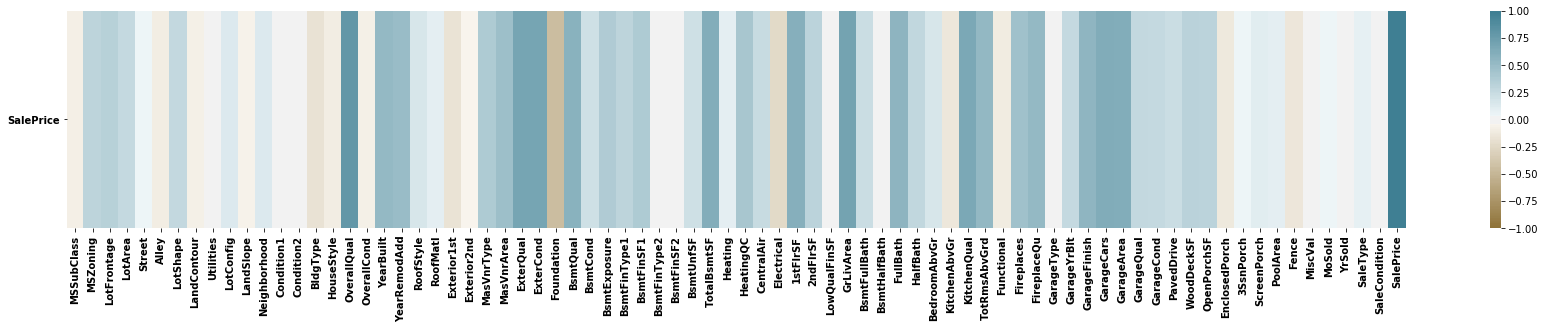

In [13]:
f,ax=plt.subplots(figsize=(30,4))
corr = data_cleaned.corr()
ax = sns.heatmap(corr.sort_values(by=['SalePrice'], ascending=False).head(1),
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(420, 220, n=200),
square=False)

plt.xticks(weight='bold')
plt.yticks(weight='bold', rotation=0)


In [14]:
corr = data_cleaned.corr()
corrVal=corr["SalePrice"].sort_values(ascending=False).to_frame()
corrVal.head(50)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
ExterCond,0.682639
ExterQual,0.682639
KitchenQual,0.659600
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852


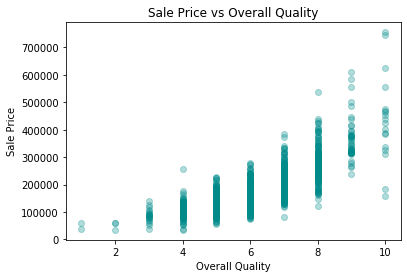

In [15]:
plt.scatter(data_cleaned["OverallQual"], data_cleaned["SalePrice"], c="darkcyan", alpha=0.3)
plt.title('Sale Price vs Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

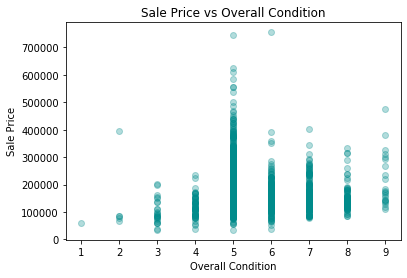

In [16]:
plt.scatter(data_cleaned["OverallCond"], data_cleaned["SalePrice"], c="darkcyan", alpha=0.3)
plt.title('Sale Price vs Overall Condition')
plt.xlabel('Overall Condition')
plt.ylabel('Sale Price')
plt.show()

C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(13.625, 0.5, 'Sale Price')

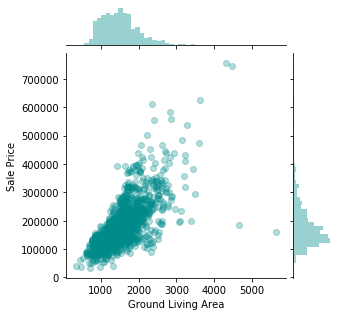

In [17]:
#plt.scatter(data_cleaned["GrLivArea"], data_cleaned["SalePrice"], c="darkcyan", alpha=0.3)
#plt.title('Sale Price vs GrLivArea')
#plt.xlabel('GrLivArea')
#plt.ylabel('Sale Price')
#plt.show()

h=sns.jointplot(x=data_cleaned["GrLivArea"], y=data_cleaned["SalePrice"], color="darkcyan", alpha=0.3, size=4.5)
h.ax_joint.set_xlabel('Ground Living Area')
h.ax_joint.set_ylabel('Sale Price')

Text(18.125, 0.5, 'Sale Price')

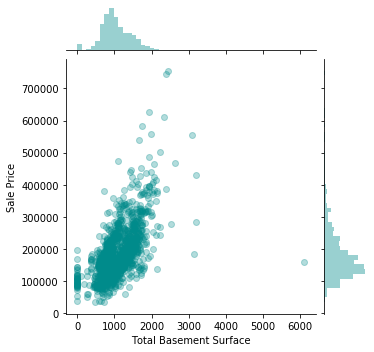

In [18]:
#plt.scatter(data_cleaned["TotalBsmtSF"], data_cleaned["SalePrice"], c="darkcyan", alpha=0.3)
#plt.title('Sale Price vs TotalBsmtSF')
#plt.xlabel('TotalBsmtSF')
#plt.ylabel('Sale Price')
#plt.show()

h=sns.jointplot(x=data_cleaned["TotalBsmtSF"], y=data_cleaned["SalePrice"], color="darkcyan", alpha=0.3, size=5)
h.ax_joint.set_xlabel('Total Basement Surface')
h.ax_joint.set_ylabel('Sale Price')


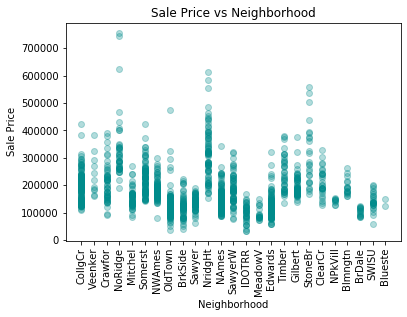

In [19]:
data_cleaned['Neighborhood'] = data_cleaned['Neighborhood'].replace(0,"NAmes").replace(1,"CollgCr").replace(2,"OldTown").replace(3,"Edwards").replace(4,"Somerst").replace(5,"Gilbert").replace(6,"NridgHt").replace(7,"Sawyer").replace(8,"NWAmes").replace(9,"SawyerW").replace(10,"BrkSide").replace(11,"Crawfor").replace(12,"Mitchel").replace(13,"NoRidge").replace(14,"Timber").replace(15,"IDOTRR").replace(16,"ClearCr").replace(17,"SWISU").replace(18,"StoneBr").replace(19,"Blmngtn").replace(20,"MeadowV").replace(21,"BrDale").replace(22,"Veenker").replace(23,"NPkVill").replace(24,"Blueste")

plt.scatter(data_cleaned["Neighborhood"], data_cleaned["SalePrice"], c="darkcyan", alpha=0.3)
plt.title('Sale Price vs Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.xticks(rotation=90)
plt.show()

data_cleaned['Neighborhood'] = data_cleaned['Neighborhood'].replace("NAmes", 0).replace("CollgCr",1).replace("OldTown",2).replace("Edwards",3).replace("Somerst", 4).replace("Gilbert", 5).replace("NridgHt", 6).replace("Sawyer", 7).replace("NWAmes",8).replace("SawyerW", 9).replace("BrkSide",10).replace("Crawfor",11).replace("Mitchel",12).replace("NoRidge", 13).replace("Timber", 14).replace("IDOTRR", 15).replace("ClearCr",16).replace("SWISU", 17).replace("StoneBr", 18).replace("Blmngtn", 19).replace("MeadowV", 20).replace("BrDale", 21).replace("Veenker", 22).replace("NPkVill", 23).replace("Blueste", 24)


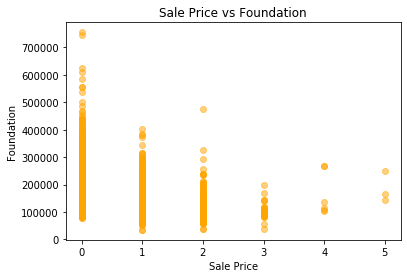

In [20]:
plt.scatter(data_cleaned["Foundation"], data_cleaned["SalePrice"], c="orange", alpha=0.5)
plt.title('Sale Price vs Foundation')
plt.xlabel('Sale Price')
plt.ylabel('Foundation')
plt.show()

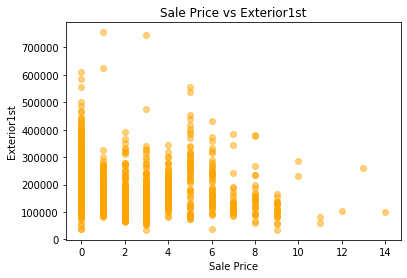

In [21]:
plt.scatter(data_cleaned["Exterior1st"], data_cleaned["SalePrice"], c="orange", alpha=0.5)
plt.title('Sale Price vs Exterior1st')
plt.xlabel('Sale Price')
plt.ylabel('Exterior1st')
plt.show()

In [22]:
X = StandardScaler().fit_transform(data_cleaned.values)

db = DBSCAN(eps=12.0, min_samples=10).fit(X)
labels = db.labels_

print(pd.Series(labels).value_counts())
data_cleaned["Outliers"]=labels
data_cleaned = data_cleaned[data_cleaned.Outliers != -1]
data_cleaned=data_cleaned.drop(columns=["Outliers"] )

 0    1418
-1      42
dtype: int64


### feature engineering

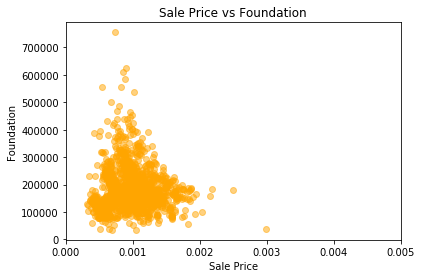

In [23]:
#new features
data_cleaned["BathOverAreaWithBsmt"]=(data_cleaned["BsmtFullBath"]+data_cleaned["BsmtHalfBath"]+data_cleaned["FullBath"]+data_cleaned["HalfBath"])/(data_cleaned["TotalBsmtSF"]+data_cleaned["GrLivArea"])
plt.scatter(data_cleaned["BathOverAreaWithBsmt"], data_cleaned["SalePrice"], c="orange", alpha=0.5)
plt.title('Sale Price vs Foundation')
plt.xlabel('Sale Price')
plt.xlim(0, 0.005)
plt.ylabel('Foundation')
plt.show()

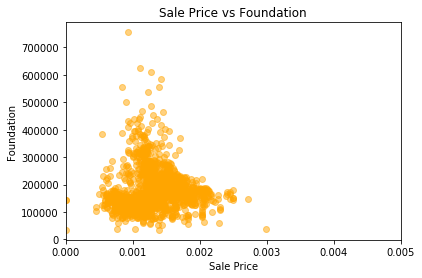

In [24]:
data_cleaned["BathOverArea"]=(data_cleaned["FullBath"]+data_cleaned["HalfBath"])/(data_cleaned["GrLivArea"])
plt.scatter(data_cleaned["BathOverArea"], data_cleaned["SalePrice"], c="orange", alpha=0.5)
plt.title('Sale Price vs Foundation')
plt.xlabel('Sale Price')
plt.xlim(0, 0.005)
plt.ylabel('Foundation')
plt.show()

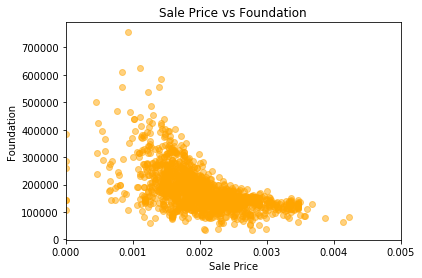

In [25]:
data_cleaned["BedroomOverArea"]=data_cleaned["BedroomAbvGr"]/data_cleaned["GrLivArea"]
plt.scatter(data_cleaned["BedroomOverArea"], data_cleaned["SalePrice"], c="orange", alpha=0.5)
plt.title('Sale Price vs Foundation')
plt.xlabel('Sale Price')
plt.xlim(0, 0.005)
plt.ylabel('Foundation')
plt.show()

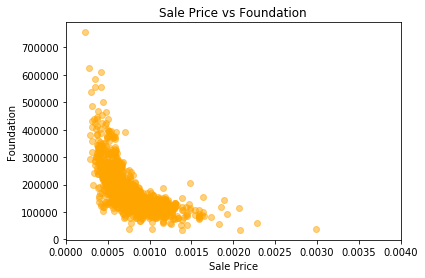

In [26]:
data_cleaned["KitchenOverArea"]=data_cleaned["KitchenAbvGr"]/data_cleaned["GrLivArea"]
plt.scatter(data_cleaned["KitchenOverArea"], data_cleaned["SalePrice"], c="orange", alpha=0.5)
plt.title('Sale Price vs Foundation')
plt.xlabel('Sale Price')
plt.xlim(0, 0.004)
plt.ylabel('Foundation')
plt.show()

In [27]:
data_cleaned.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BathOverAreaWithBsmt,BathOverArea,BedroomOverArea,KitchenOverArea
0,60,3,65.0,8450,2,0,0,3,1,0,...,0,2,2008,0,0,208500,0.001559,0.001754,0.001754,0.000585
1,20,3,80.0,9600,2,0,0,3,1,2,...,0,5,2007,0,0,181500,0.001189,0.001585,0.002377,0.000792
2,60,3,68.0,11250,2,0,1,3,1,0,...,0,9,2008,0,0,223500,0.001478,0.001680,0.001680,0.000560
3,70,3,60.0,9550,2,0,1,3,1,1,...,0,2,2006,0,2,140000,0.000809,0.000582,0.001747,0.000582
4,60,3,84.0,14260,2,0,1,3,1,2,...,0,12,2008,0,0,250000,0.001197,0.001365,0.001820,0.000455


In [28]:
print(data_cleaned.columns)
x = data_cleaned.iloc[:, 0:len(data_cleaned.columns)-2].to_numpy()
y = data_cleaned['SalePrice'].to_numpy()


# Train test split
train_test_ratio = 0.2

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=train_test_ratio, random_state=42)

print("Train: ", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# Scaling and PCA

To perform a PCA, the data should first be normalised. To do so, the data are scaled using their minimum and maximum values.
The dataset must be also divided in a train and test set.

In [29]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Then the PCA is done. The explained variance ratio provides the amount of variance explained by each dimensions of the problem. These dimensions do not have clear meanings in our problem. 80% of the sale price could be explained by only 22 dimensions instead of 77 given at the begining.

In [30]:
pca = PCA()
pca.fit(X_train)
variance = np.cumsum(pca.explained_variance_ratio_)

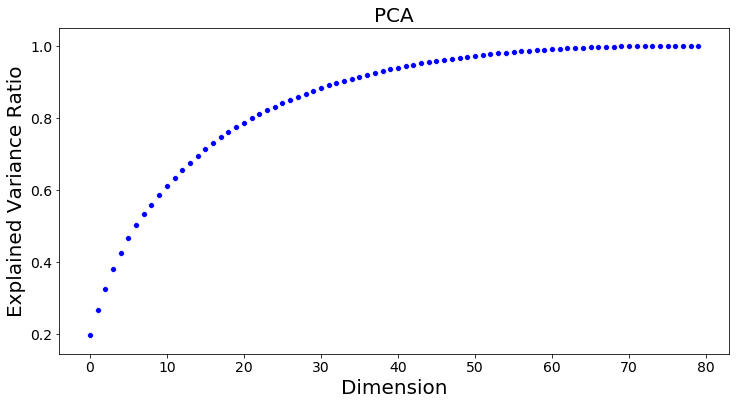

[0.19699896 0.26740251 0.32694056 0.38207659 0.42589069 0.46783631
 0.50267635 0.53255578 0.5601016  0.58673237 0.6109767  0.63400161
 0.65564866 0.67651424 0.69593664 0.71403229 0.73048237 0.74639303
 0.76118891 0.77492392 0.78786856 0.79980662 0.81102652 0.82164323]


In [31]:
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(data=variance,color='b')
ax.set_xlabel('Dimension', fontsize = 20)
ax.set_ylabel('Explained Variance Ratio', fontsize = 20)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.title("PCA", fontsize = 20)
plt.show()
print(variance[0:24])

In [32]:
pca = PCA(n_components=70)
pca.fit(X_train)
#train_input = pca.transform(X_train)
#test_input = pca.transform(X_test)
train_input = X_train
test_input = X_test
print(y_train)

[143000 143750 151000 ... 125500 145000 230000]


# Data Preprocessing before Machine Learning

In [33]:
# Tensorflow deep feed forward

activation_functions = ['elu', 'exponential', 'hard_sigmoid', 'linear', 'relu', 'selu']
i = 1 # 1 4 5
input_layer = Input(shape=(train_input.shape[1],))
dense_layer_1 = Dense(200, activation=activation_functions[i])(input_layer)
dense_layer_2 = Dense(130, activation=activation_functions[i])(dense_layer_1)
dense_layer_3 = Dense(60, activation=activation_functions[i])(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80)]              0         
_________________________________________________________________
dense (Dense)                (None, 200)               16200     
_________________________________________________________________
dense_1 (Dense)              (None, 130)               26130     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                7860      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 50,251
Trainable params: 50,251
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
history = model.fit(train_input, y_train, batch_size=10, epochs=100, verbose=1, validation_split=0.2)

Train on 907 samples, validate on 227 samples
Epoch 1/100
907/907 [==============================] - 2s 3ms/sample - loss: 125617805215.4708 - mean_squared_error: 125617807360.0000 - val_loss: 12693025290.1498 - val_mean_squared_error: 12693026816.0000
Epoch 2/100
907/907 [==============================] - 0s 410us/sample - loss: 11281382587.2723 - mean_squared_error: 11281380352.0000 - val_loss: 9064866696.4581 - val_mean_squared_error: 9064866816.0000
Epoch 3/100
907/907 [==============================] - 0s 452us/sample - loss: 5992229216.6703 - mean_squared_error: 5992230400.0000 - val_loss: 3122584037.4978 - val_mean_squared_error: 3122584064.0000
Epoch 4/100
907/907 [==============================] - 0s 447us/sample - loss: 5038029787.0959 - mean_squared_error: 5038029824.0000 - val_loss: 3115322783.2952 - val_mean_squared_error: 3115323136.0000
Epoch 5/100
907/907 [==============================] - 0s 435us/sample - loss: 2669850370.6814 - mean_squared_error: 2669850624.0000 - v

907/907 [==============================] - 0s 419us/sample - loss: 935985968.3440 - mean_squared_error: 935985792.0000 - val_loss: 8745438420.0176 - val_mean_squared_error: 8745439232.0000
Epoch 42/100
907/907 [==============================] - 0s 439us/sample - loss: 1298773356.8776 - mean_squared_error: 1298773504.0000 - val_loss: 1041565923.3833 - val_mean_squared_error: 1041565824.0000
Epoch 43/100
907/907 [==============================] - 0s 405us/sample - loss: 744556659.8897 - mean_squared_error: 744556736.0000 - val_loss: 598214580.8634 - val_mean_squared_error: 598214592.0000
Epoch 44/100
907/907 [==============================] - 1s 568us/sample - loss: 2466488952.6968 - mean_squared_error: 2466488576.0000 - val_loss: 2945546357.0044 - val_mean_squared_error: 2945546496.0000
Epoch 45/100
907/907 [==============================] - 0s 517us/sample - loss: 1531728442.9372 - mean_squared_error: 1531728512.0000 - val_loss: 734724563.7357 - val_mean_squared_error: 734724608.0000
E

Epoch 82/100
907/907 [==============================] - 0s 461us/sample - loss: 1381040199.6207 - mean_squared_error: 1381040000.0000 - val_loss: 1014019960.1057 - val_mean_squared_error: 1014019904.0000
Epoch 83/100
907/907 [==============================] - 0s 413us/sample - loss: 2150070331.2370 - mean_squared_error: 2150070528.0000 - val_loss: 537049483.7004 - val_mean_squared_error: 537049408.0000
Epoch 84/100
907/907 [==============================] - 1s 581us/sample - loss: 883536969.6406 - mean_squared_error: 883536960.0000 - val_loss: 855438757.9207 - val_mean_squared_error: 855438784.0000
Epoch 85/100
907/907 [==============================] - 0s 410us/sample - loss: 1818652554.6814 - mean_squared_error: 1818652416.0000 - val_loss: 835133266.7489 - val_mean_squared_error: 835133184.0000
Epoch 86/100
907/907 [==============================] - 1s 641us/sample - loss: 2058691370.8666 - mean_squared_error: 2058690944.0000 - val_loss: 7381279507.1718 - val_mean_squared_error: 7381

In [35]:
pred_train = model.predict(train_input)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(test_input)
print(np.sqrt(mean_squared_error(y_test,pred)))

15649.367132351501
19813.413637008718


In [36]:
# Random TF prediction function
def random_prediction(x: np.ndarray, model, n=5):
    size = x.shape[0]-1
    for _ in range(n):
        number = random.randint(0, size)
        y = y_test[number]
        y_hat = int(model.predict(test_input[number].reshape(1, -1))[0])
        print("Real price: ", y, " Predicted one: ", y_hat, " Error: ", int((y-y_hat)/y_hat*100), "%")

In [37]:
# Train folding (cross-val)
n = 6
cv = ShuffleSplit(n_splits=n, test_size=0.3, random_state=0)
print(cv)

ShuffleSplit(n_splits=6, random_state=0, test_size=0.3, train_size=None)


In [38]:
# Random sklearn prediction function
def random_prediction(x: np.ndarray, reg, n=5):
    size = x.shape[0]-1
    for _ in range(n):
        number = random.randint(0, size)
        y = y_test[number]
        y_hat = int(reg.predict(test_input[number].reshape(1, -1))[0])
        print(y_hat)
        print("Real price: ", y, " Predicted one: ", y_hat, " Error: ", int((y-y_hat)/y_hat*100), "%")

In [39]:
# sklearn prediction function
def prediction(x: np.ndarray, reg, n=5):
    y = np.zeros((n, 3))
    
    for i in range(n): 
        y[i,0] = y_test[i]
        y[i,1] = int(reg.predict(test_input[i].reshape(1, -1))[0])
        y[i,2] = y[i,1] - y[i,0]
        
    y_predicted = pd.DataFrame(y, columns=('Actual_Price','Prediction', 'Opportunity'))
    return y_predicted

# Machine Learning
### Support vector machine

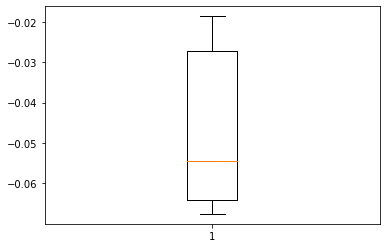

In [40]:
parameters = [1]
mse_report = np.zeros((len(parameters), n))

for i, par in enumerate(parameters):
        reg = svm.SVR()
        mse_report[i, :] = cross_val_score(reg, train_input, y_train, cv=cv)
        
plt.boxplot(mse_report.T)
mu_perf = np.mean(mse_report, axis=1)
std_perf = np.std(mse_report, axis=1)
max_perf = np.max(mse_report, axis=1)
min_perf = np.min(mse_report, axis=1)

In [41]:
king_parameter = 1

reg.fit(train_input, y_train)
y_pred = reg.predict(test_input)
y_pred_train = reg.predict(train_input)

print("MSE train: ", sqrt(mean_squared_error(y_train, y_pred_train)))
print("r2 score train: ", r2_score(y_train, y_pred_train))

print("MSE test: ", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score test: ", r2_score(y_test, y_pred))

MSE train:  80388.06056283897
r2 score train:  -0.05119372513557363
MSE test:  76734.05563436632
r2 score test:  -0.07599567194189238


In [42]:
random_prediction(x=test_input, reg=reg)

161916
Real price:  139000  Predicted one:  161916  Error:  -14 %
161906
Real price:  119500  Predicted one:  161906  Error:  -26 %
161907
Real price:  139000  Predicted one:  161907  Error:  -14 %
161940
Real price:  148000  Predicted one:  161940  Error:  -8 %
162044
Real price:  244600  Predicted one:  162044  Error:  50 %


### K Closest Neighbors 

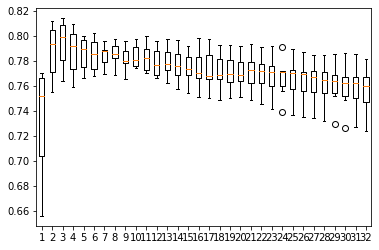

In [43]:
parameters = [i for i in range(1, 33)]
mse_report = np.zeros((len(parameters), n))
test_report = np.zeros((len(parameters), 2))

for i, par in enumerate(parameters):
        reg = KNeighborsRegressor(n_neighbors=par, n_jobs=-1)
        mse_report[i, :] = cross_val_score(reg, train_input, y_train, cv=cv)
        reg.fit(train_input, y_train)
        y_pred = reg.predict(train_input)
        test_report[i, 0] = mean_squared_error(y_train, y_pred)
        y_pred = reg.predict(test_input)
        test_report[i, 1] = mean_squared_error(y_test, y_pred)
        
        
        
plt.boxplot(mse_report.T)
mu_perf = np.mean(mse_report, axis=1)
std_perf = np.std(mse_report, axis=1)
max_perf = np.max(mse_report, axis=1)
min_perf = np.min(mse_report, axis=1)

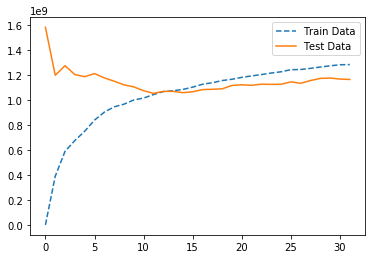

In [44]:
plt.plot(test_report[:, 0], "--", label = 'Train Data')
plt.plot(test_report[:, 1], label = 'Test Data')
plt.legend()

In [45]:
king_parameter = 3
print(train_input.shape)
reg.fit(train_input, y_train)
y_pred = reg.predict(test_input)
y_pred_train = reg.predict(train_input)

print("MSE train: ", sqrt(mean_squared_error(y_train, y_pred_train)))
print("r2 score train: ", r2_score(y_train, y_pred_train))

print("MSE test: ", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score test: ", r2_score(y_test, y_pred))

(1134, 80)
MSE train:  35831.183671170016
r2 score train:  0.7911560166321927
MSE test:  34131.21004345669
r2 score test:  0.7871186625222067


In [46]:
random_prediction(x=test_input, reg=reg)

246432
Real price:  286000  Predicted one:  246432  Error:  16 %
150145
Real price:  150000  Predicted one:  150145  Error:  0 %
198866
Real price:  192140  Predicted one:  198866  Error:  -3 %
200333
Real price:  198500  Predicted one:  200333  Error:  0 %
114363
Real price:  123600  Predicted one:  114363  Error:  8 %


### Random Forest 

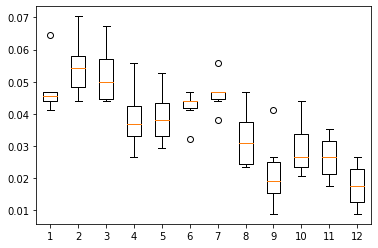

In [47]:
parameters = [(100, 100), (100, 50), (100, 20), (100, 5), (50, 100), (50, 50), (50, 20), (50, 5), 
              (10, 100), (10, 50), (10, 20), (10, 5)]

mse_report = np.zeros((len(parameters), n))

for i, par in enumerate(parameters):
        reg = RandomForestClassifier(n_estimators=par[0], max_depth=par[1], min_samples_split=2, min_samples_leaf=1)
        mse_report[i, :] = cross_val_score(reg, train_input, y_train, cv=cv)
        
plt.boxplot(mse_report.T)
mu_perf = np.mean(mse_report, axis=1)
std_perf = np.std(mse_report, axis=1)
max_perf = np.max(mse_report, axis=1)
min_perf = np.min(mse_report, axis=1)

In [48]:
king_parameter = (50, 20)

reg = RandomForestClassifier(n_estimators=king_parameter[0], max_depth=king_parameter[1], min_samples_split=2, min_samples_leaf=1)
reg.fit(train_input, y_train)
y_pred = reg.predict(test_input)
y_pred_train = reg.predict(train_input)

print("MSE train: ", sqrt(mean_squared_error(y_train, y_pred_train)))
print("r2 score train: ", r2_score(y_train, y_pred_train))
print("MSE test: ", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score test: ", r2_score(y_test, y_pred))

MSE train:  0.0
r2 score train:  1.0
MSE test:  31232.21745215785
r2 score test:  0.8217457641919904


In [49]:
random_prediction(x=test_input, reg=reg)

153000
Real price:  230000  Predicted one:  153000  Error:  50 %
144000
Real price:  131000  Predicted one:  144000  Error:  -9 %
185000
Real price:  185000  Predicted one:  185000  Error:  0 %
193000
Real price:  185000  Predicted one:  193000  Error:  -4 %
190000
Real price:  175000  Predicted one:  190000  Error:  -7 %


### Neural Network

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 75, 50, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimi

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 66, 33), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimi

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimi

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimi

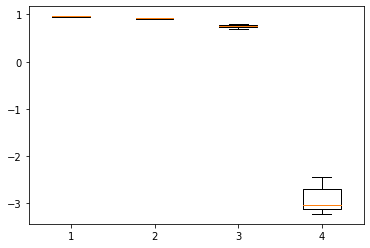

In [50]:
parameters = [(100, 75, 50, 25), (100, 66, 33), (100, 50), (100,)]
mse_report = np.zeros((len(parameters), n))

for i, par in enumerate(parameters):
        reg = MLPRegressor(hidden_layer_sizes=par, activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
        print(reg.get_params())
        mse_report[i, :] = cross_val_score(reg, train_input, y_train, cv=cv)
        
plt.boxplot(mse_report.T)
mu_perf = np.mean(mse_report, axis=1)
std_perf = np.std(mse_report, axis=1)
max_perf = np.max(mse_report, axis=1)
min_perf = np.min(mse_report, axis=1)

In [51]:
king_parameter = (100, 66, 33)

reg = MLPRegressor(hidden_layer_sizes=king_parameter, activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
reg.fit(train_input, y_train)

y_pred = reg.predict(test_input)
y_pred_train = reg.predict(train_input)

print("MSE train: ", sqrt(mean_squared_error(y_train, y_pred_train)))
print("r2 score train: ", r2_score(y_train, y_pred_train))

print("MSE test: ", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score test: ", r2_score(y_test, y_pred))

MSE train:  16306.206306143818
r2 score train:  0.956748066839722
MSE test:  18000.760845788856
r2 score test:  0.940787152947658


C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [52]:
random_prediction(x=test_input, reg=reg, n=5)

212001
Real price:  227000  Predicted one:  212001  Error:  7 %
146561
Real price:  145000  Predicted one:  146561  Error:  -1 %
193826
Real price:  175000  Predicted one:  193826  Error:  -9 %
159547
Real price:  140000  Predicted one:  159547  Error:  -12 %
339735
Real price:  345000  Predicted one:  339735  Error:  1 %


### Business Analysis 

The Opportunity columns represent the possible profit we could make by buying the house.

In [53]:
results = prediction(x=test_input, reg=reg, n=len(test_input))
Opportunity = results.sort_values(['Opportunity'], ascending=False,)
print(Opportunity[:10])

     Actual_Price  Prediction  Opportunity
39       260000.0    341987.0      81987.0
102       82500.0    159156.0      76656.0
200      240000.0    302839.0      62839.0
148      276000.0    332895.0      56895.0
260      136000.0    187428.0      51428.0
212      110000.0    160803.0      50803.0
144      187500.0    232061.0      44561.0
237      380000.0    421226.0      41226.0
56       386250.0    427084.0      40834.0
23       315000.0    355458.0      40458.0
